# Estimation Using Maximum Likelihood 

## Các khái niệm và vấn đề cơ bản 
- Mục tiêu chính của bài toán dự đoán đó là dựa vào tập dữ liệu quan sát cho trước, tìm một mô hình với tham số phù hợp với tập dữ liệu đó. Có rất nhiều mô hình, việc tìm kiếm, lựa chọn tham số cho mỗi tập dữ liệu là vô cùng khó khăn. 
- Trong thống kê, có hai cách tiếp cận chính cho việc ước lượng tham số mô hình đó là thống kê cổ điến và thống kê theo trường phái Bayes. Trên thực tế, thống kê theo Bayes thường được sử dụng nhiều hơn, thông qua việc đặt giá trị ước lượng $\theta$ là một biến ngẫu nhiên xác suất dựa trên tập quan sát. 
- Bài toán yêu cầu tìm kiếm tham số $\theta$ sao cho sai số của mô hình là nhỏ nhất.  
- Thông thường để đánh giá, người ta thường sử dụng mean square error, được tính bằng $ E[(\theta -\hat{\theta} ) ^2] $
- Để đánh giá với tham số tìm được, mô hình nó tạo ra có fit với dữ liệu hay không người ta sử dụng một chỉ số được gọi là bias. Nó được tính như sau : $$ bias = E[\hat{\theta}] - \theta $$
- Một chỉ số nữa dùng để đánh gía mô hình đó là Variance ($ V_{\theta}(\hat{\theta})$) 
=> Khi đó MSE sẽ được tính thông qua : $$ E_{\theta}(\theta - \hat{\theta}) ^2 = bias^2 + V_{\theta}(\hat{\theta}) $$
=> Nếu giá trị MSE cố định, bias càng tăng thì variance càng giảm

## Setting up the coin flipping experiment
- Giả sử ta có một biến ngẫu nhiên Bernoulli miêu tả khả năng xảy ra của tung đồng xu được mô tả theo phương trình $ \Theta (x) = p^x(1 - p) ^ {1 - x} $ với x là kết quả - 0 là head , 1 là tails. 
- Hàm likelihood sau n lần tung với tham số ước lượng là p như sau : $$ L(p, x) = \prod ^n _{i = 1} p^{x_i}(1 - p)^{1 - x_i} $$
- Nguyên lý của maximum likelihood là tìm giá trị của tham số sao cho giá trị của hàm likelihood là lớn nhất. 

In [114]:
from scipy.stats import bernoulli 
import numpy as np 
import sympy

p_true = 1/2 # target want to estimate
fp = bernoulli(p_true) # create bernoulli random variate

xs = fp.rvs(1000) # generate sample
x, p, z = sympy.symbols('x p z', positive = True)
phi = p**x * (1 - p) **(1 - x)

L = np.prod([phi.subs(x, i) for i in xs])
print(L)


p**529*(1 - p)**471


In [115]:
logL = sympy.expand_log(sympy.log(L))
sol, = sympy.solve(sympy.diff(logL, p), p)
print(sol)

529/1000


In [116]:
logL

529*log(p) + log((1 - p)**471)

In [117]:
import math
func = lambda x : 438 * math.log(x) + 517 * math.log(1 - x)

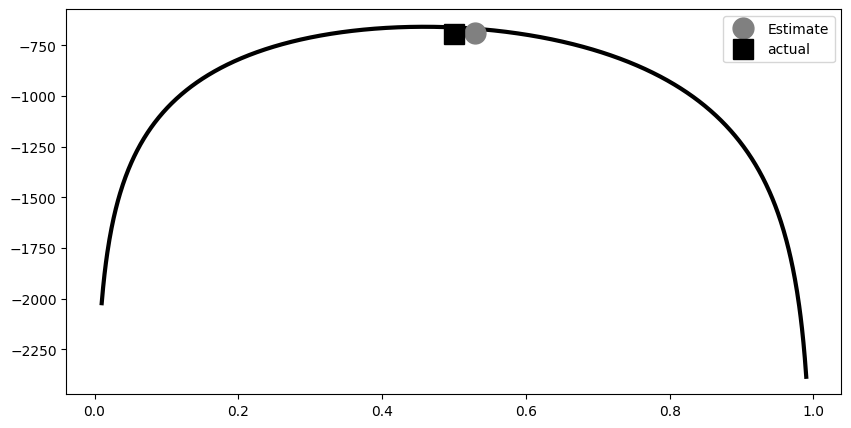

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
x = np.linspace(0.01, 0.99, 1000)
plt.plot(x, [func(i) for i in x], 'k-', lw = 3)
plt.plot(sol, logL.subs(p, sol), 'o', color = 'gray', ms = 15, label = 'Estimate')
plt.plot(p_true, logL.subs(p, p_true), 's', color = 'k', ms = 15, label = "actual")
plt.legend()
plt.show()

- Giá trị mà ta mong muốn ước lượng $\hat{p}$ cũng là một biến ngẫu nhiên do nó phụ thuộc vào tập dữ liệu mà ta thu thập được. Mô phỏng 1000 lần lấy mẫu của 100 lần tung đồng xu, thấy giá trị $\hat{p}$ tiến dần tới giá trị thực p

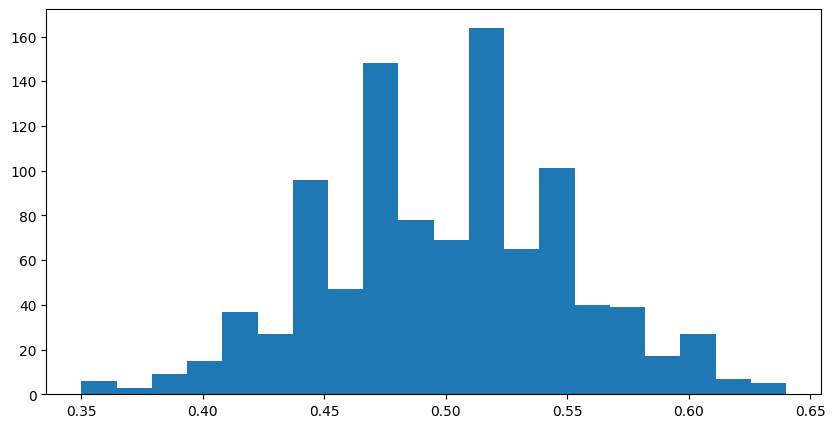

In [119]:
avg = []
x, p, z = sympy.symbols('x p z', positive = True)
for i in range(1000) : 
    txs = fp.rvs(100)
    tL = np.prod([phi.subs(x, i) for i in txs])
    tlogL = sympy.expand_log(sympy.log(tL))
    sol, = sympy.solve(sympy.diff(tlogL, p), p)
    avg.append(float(sol))

plt.figure(figsize= (10, 5))
plt.hist(avg, bins = 20)
plt.show()

- Vậy biến ngẫu nhiên $\hat{p}$ tuân theo phân bố nào ?. Trong trường hợp này, biến ngẫu nhiên $\hat(p)$ sẽ gần tuân theo phân bố nhị phân (không sử dụng luật giới hạn trung tâm)
- Khoảng tự tin : Khi đã có phân bố của biến $\hat{p}$ một câu hỏi được đặt ra đó là xác suất để sai số giữa $\hat{p}$ và p nhỏ hơn một tỉ lệ $\epsilon$ p nào đó ?  

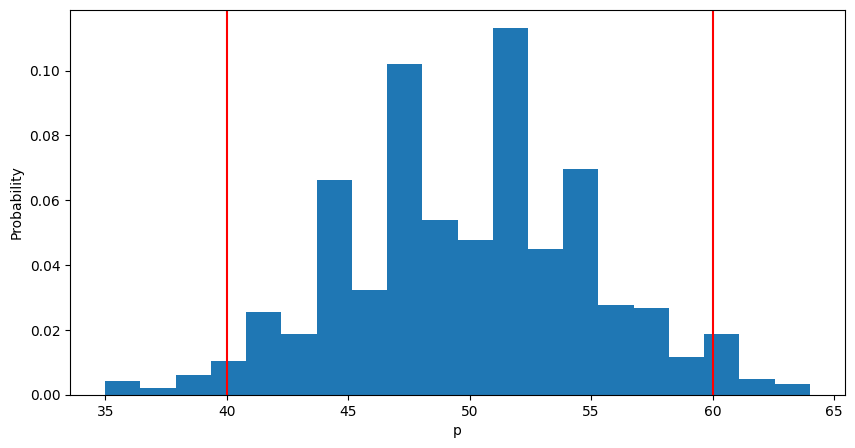

In [120]:
e = 20 
n = 100 

plt.figure(figsize =(10, 5))
plt.hist(np.array(avg) * 100, bins = 20, density= True)
plt.axvline((100 - e) * 1/2, 0, 8,  color = 'red')
plt.axvline((100+ e) * 0.5, 0, 8, color = 'red')
plt.xlabel("p")
plt.ylabel('Probability')
plt.show()

In [122]:
from scipy.stats import binom

b = binom(100, 0.5)

g = lambda i : b.pmf(np.arange(-i, i) + 50).sum()
print(g(1))

0.15761790149225594
